In [101]:
!pip install xgboost

In [129]:
import os 
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection  import cross_val_score as CVS
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
sns.set(context='notebook', style='whitegrid', palette='Dark2', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.set_option('display.max_columns', None)

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [103]:
# Mushroom_path = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv"
Mushroom_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")
"Data Shape (row, col): {}".format(Mushroom_df.shape)
Mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [130]:
M_cols = Mushroom_df.columns.to_list()
print("Value Distribution:\n")
for col in M_cols:
    print(col,"\n",Mushroom_df[col].value_counts(),"\n\n") 

Value Distribution:

class 
 e    4208
p    3916
Name: class, dtype: int64 


cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 


cap-surface 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 


cap-color 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 


bruises 
 f    4748
t    3376
Name: bruises, dtype: int64 


odor 
 n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 


gill-attachment 
 f    7914
a     210
Name: gill-attachment, dtype: int64 


gill-spacing 
 c    6812
w    1312
Name: gill-spacing, dtype: int64 


gill-size 
 b    5612
n    2512
Name: gill-size, dtype: int64 


gill-color 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 


stalk-shape 
 t  

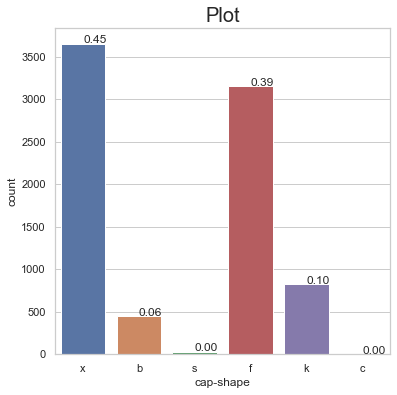

In [137]:
total = float(len(Mushroom_df[M_cols[1]]))
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
ax = sns.countplot(Mushroom_df[M_cols[1]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="left")
plt.title("Plot", fontsize = 20)
plt.show()

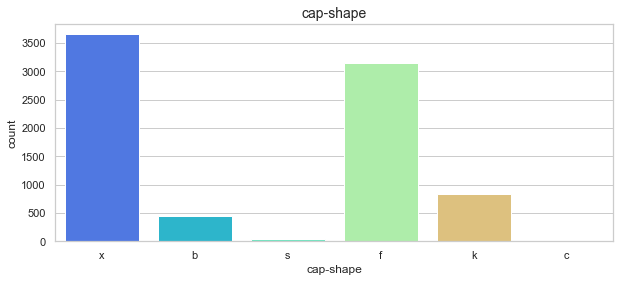

% of total:
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap-shape, dtype: float64


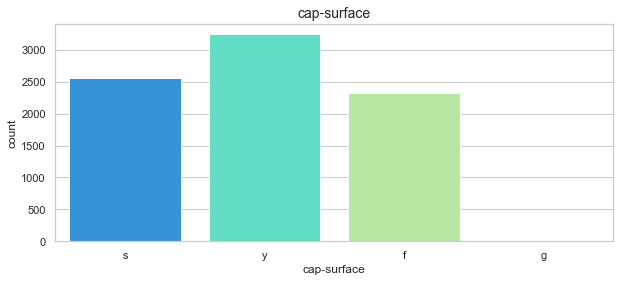

% of total:
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap-surface, dtype: float64


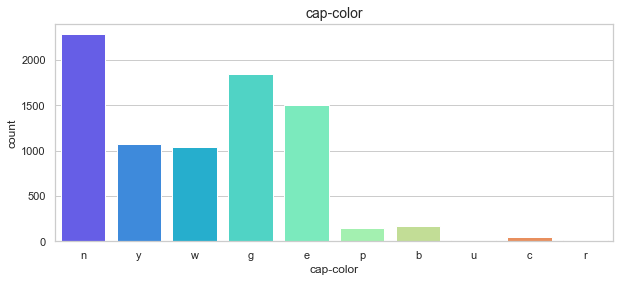

% of total:
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
u     0.20
r     0.20
Name: cap-color, dtype: float64


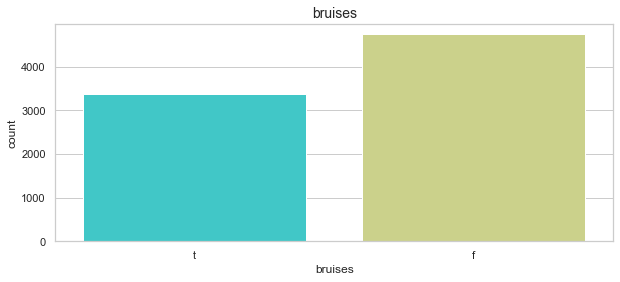

% of total:
f    58.44
t    41.56
Name: bruises, dtype: float64


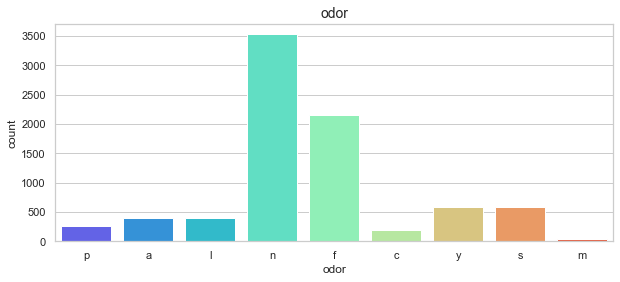

% of total:
n    43.43
f    26.59
y     7.09
s     7.09
a     4.92
l     4.92
p     3.15
c     2.36
m     0.44
Name: odor, dtype: float64


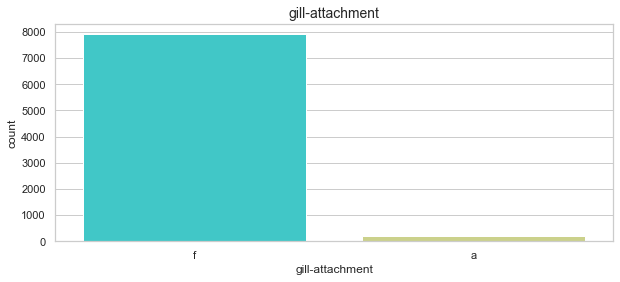

% of total:
f    97.42
a     2.58
Name: gill-attachment, dtype: float64


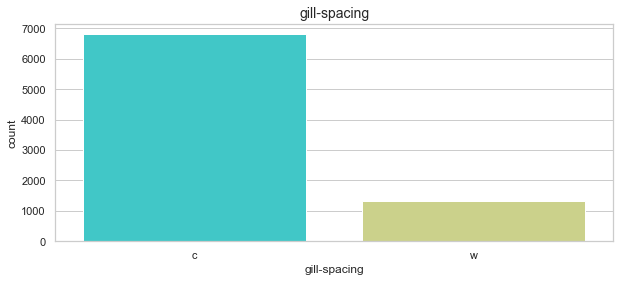

% of total:
c    83.85
w    16.15
Name: gill-spacing, dtype: float64


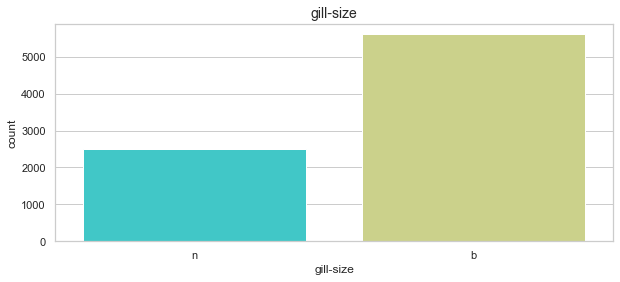

% of total:
b    69.08
n    30.92
Name: gill-size, dtype: float64


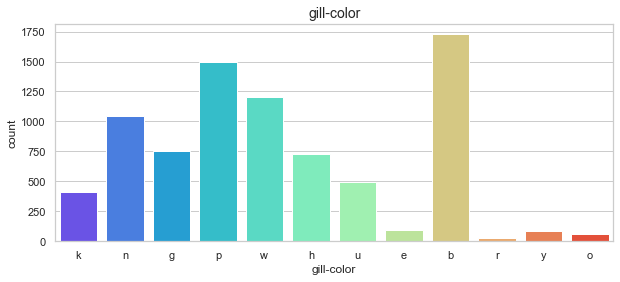

% of total:
b    21.27
p    18.37
w    14.80
n    12.90
g     9.26
h     9.01
u     6.06
k     5.02
e     1.18
y     1.06
o     0.79
r     0.30
Name: gill-color, dtype: float64


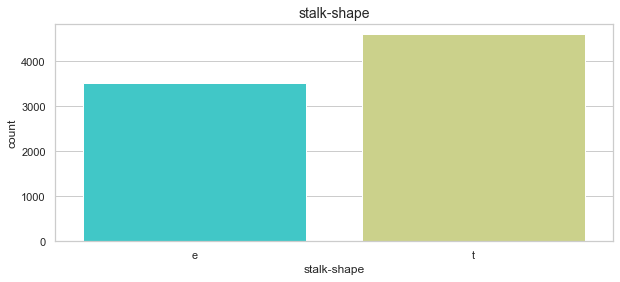

% of total:
t    56.72
e    43.28
Name: stalk-shape, dtype: float64


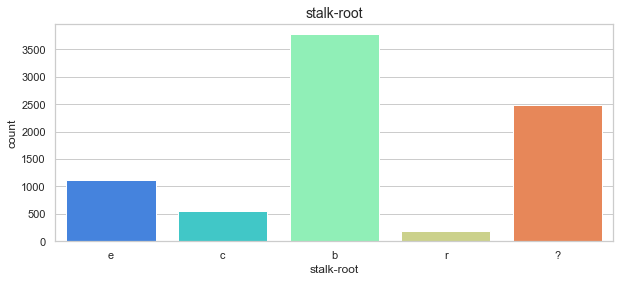

% of total:
b    46.48
?    30.53
e    13.79
c     6.84
r     2.36
Name: stalk-root, dtype: float64


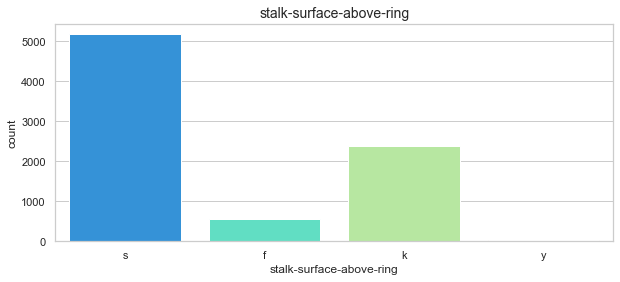

% of total:
s    63.71
k    29.20
f     6.79
y     0.30
Name: stalk-surface-above-ring, dtype: float64


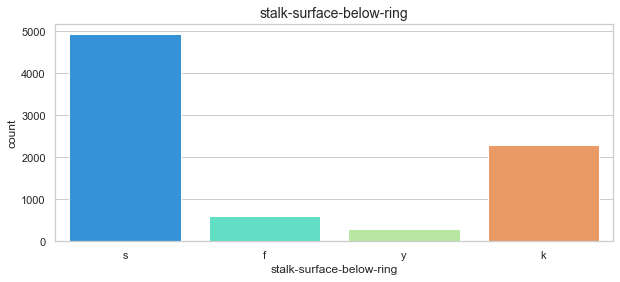

% of total:
s    60.76
k    28.36
f     7.39
y     3.50
Name: stalk-surface-below-ring, dtype: float64


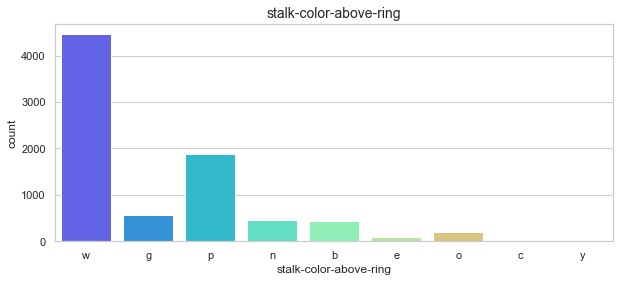

% of total:
w    54.95
p    23.04
g     7.09
n     5.51
b     5.32
o     2.36
e     1.18
c     0.44
y     0.10
Name: stalk-color-above-ring, dtype: float64


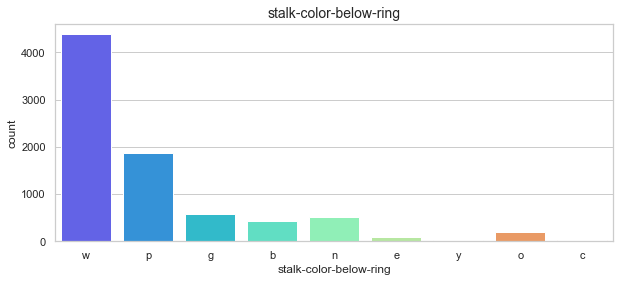

% of total:
w    53.96
p    23.04
g     7.09
n     6.30
b     5.32
o     2.36
e     1.18
c     0.44
y     0.30
Name: stalk-color-below-ring, dtype: float64


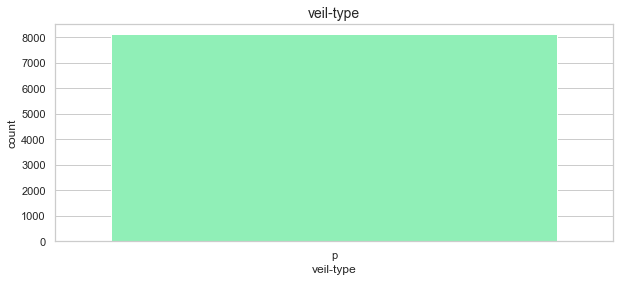

% of total:
p    100.0
Name: veil-type, dtype: float64


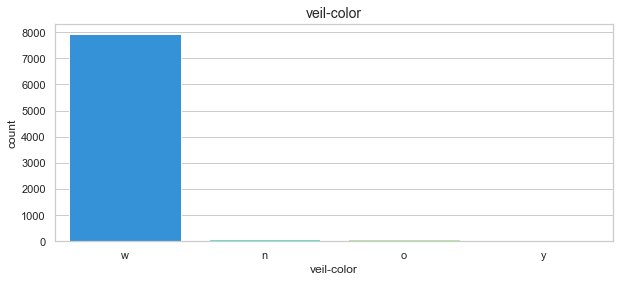

% of total:
w    97.54
n     1.18
o     1.18
y     0.10
Name: veil-color, dtype: float64


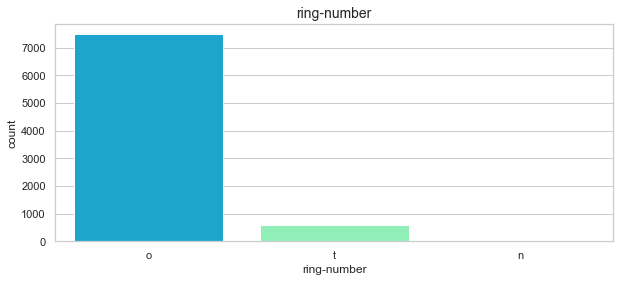

% of total:
o    92.17
t     7.39
n     0.44
Name: ring-number, dtype: float64


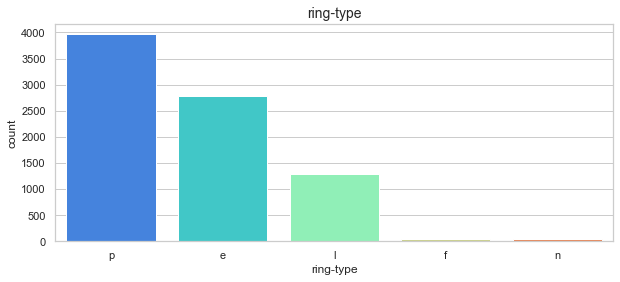

% of total:
p    48.84
e    34.17
l    15.95
f     0.59
n     0.44
Name: ring-type, dtype: float64


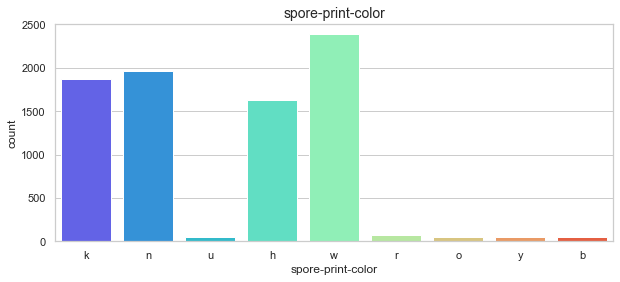

% of total:
w    29.39
n    24.22
k    23.04
h    20.09
r     0.89
u     0.59
o     0.59
y     0.59
b     0.59
Name: spore-print-color, dtype: float64


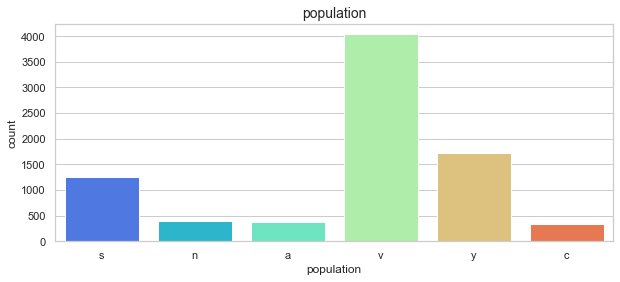

% of total:
v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: population, dtype: float64


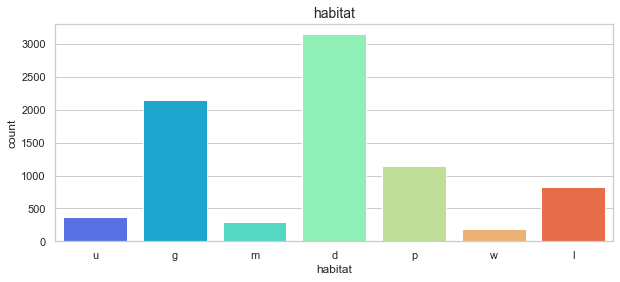

% of total:
d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64


In [141]:
for col in M_cols[1:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=Mushroom_df ,palette='rainbow')
    plt.title(col, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((Mushroom_df[col].value_counts()/Mushroom_df.shape[0]),4)*100)

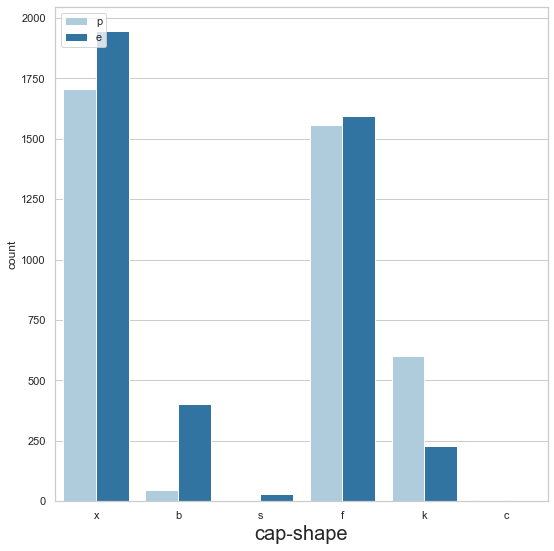

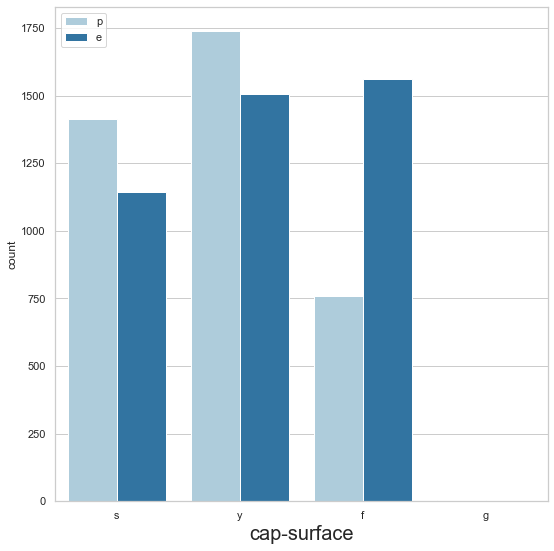

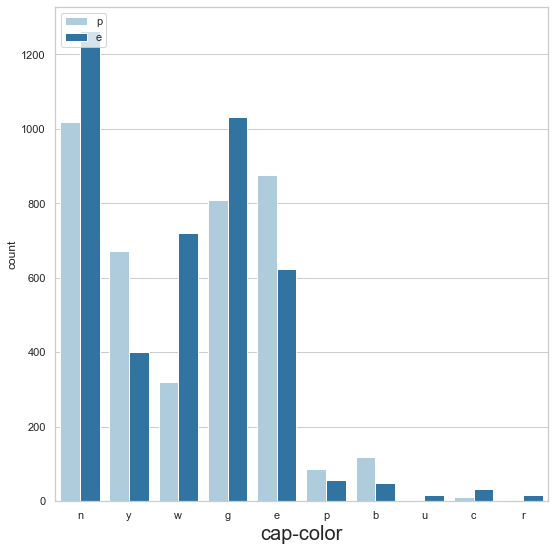

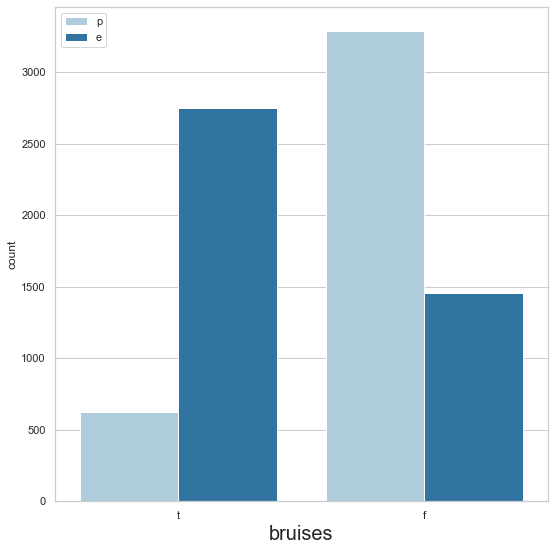

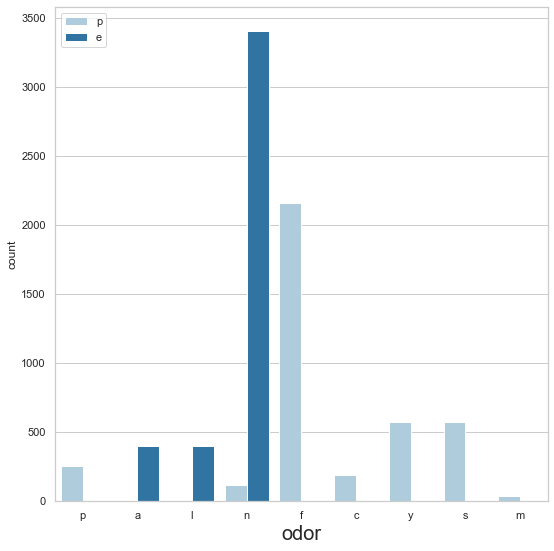

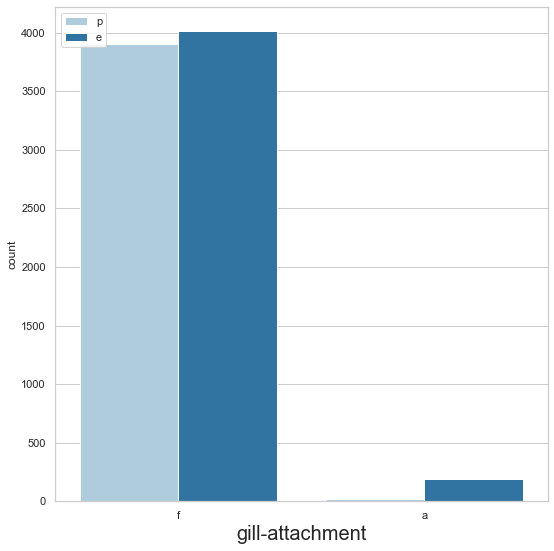

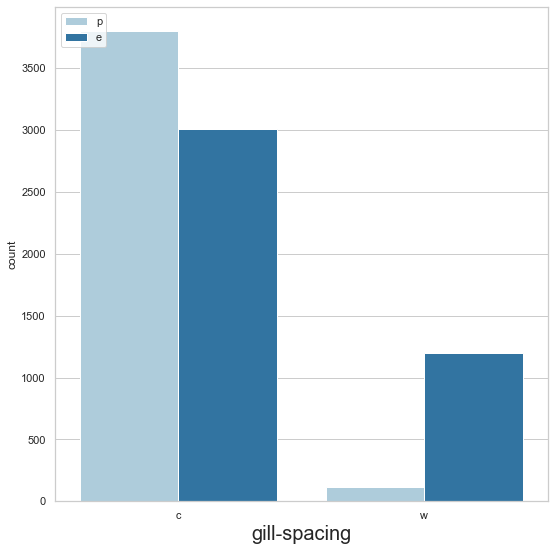

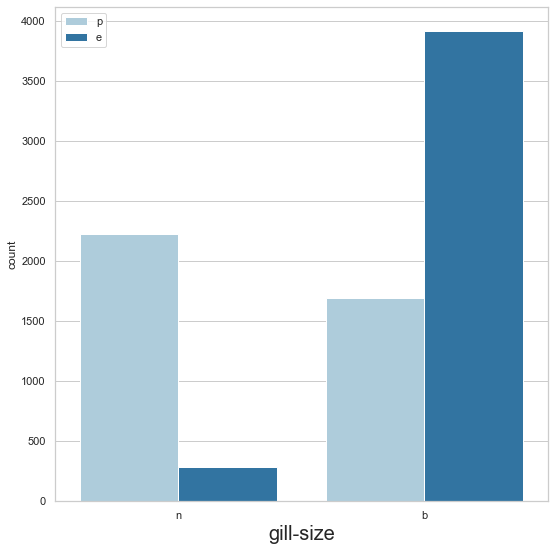

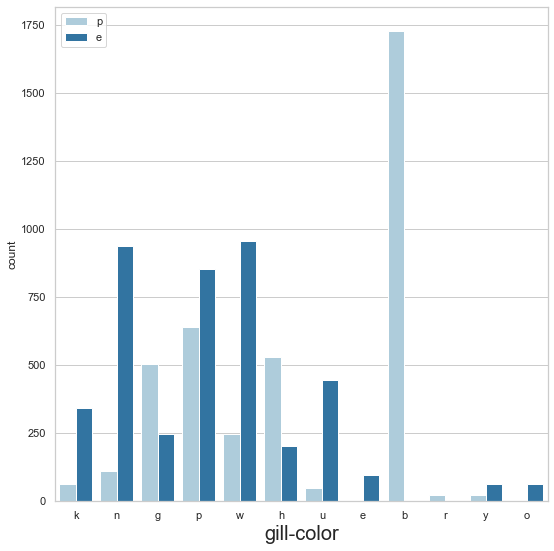

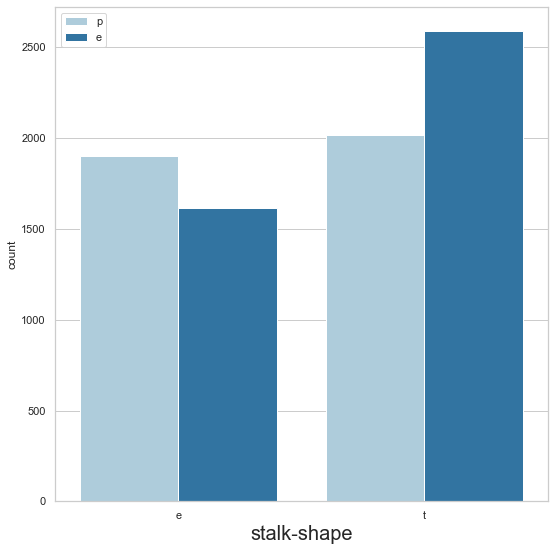

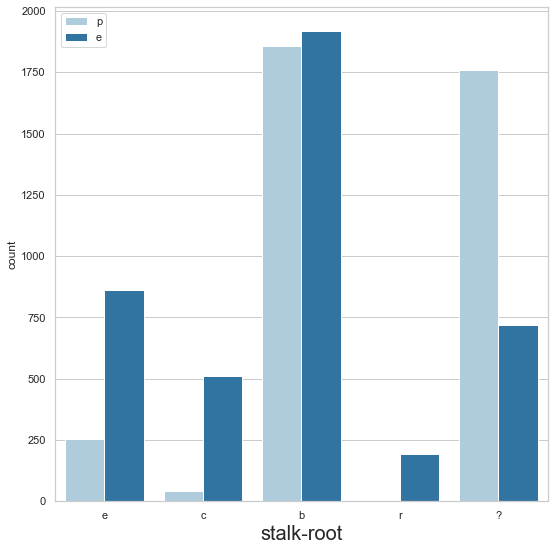

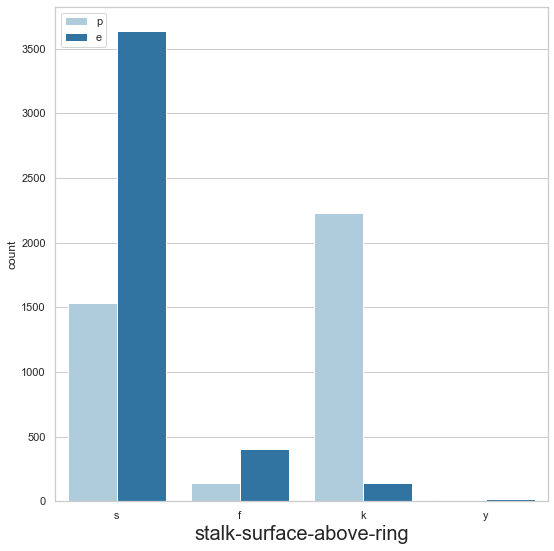

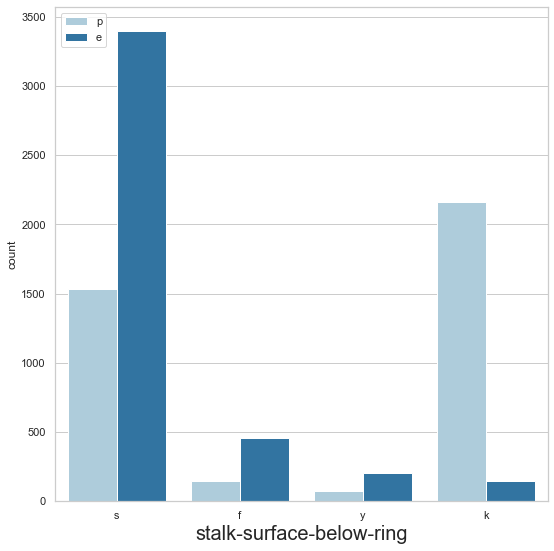

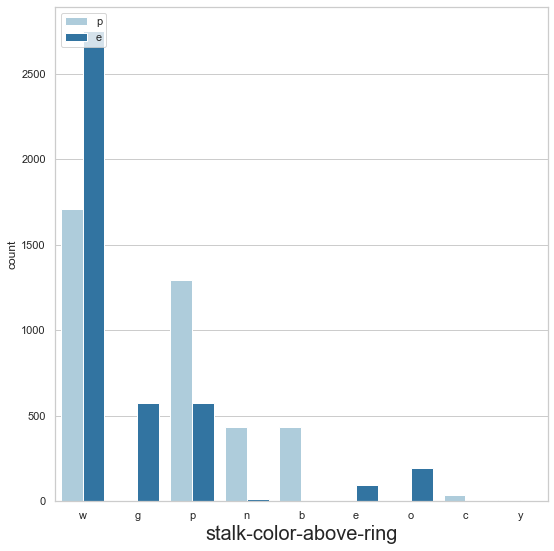

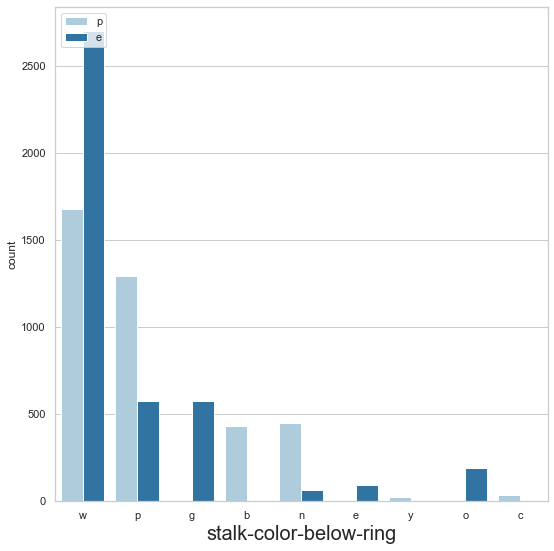

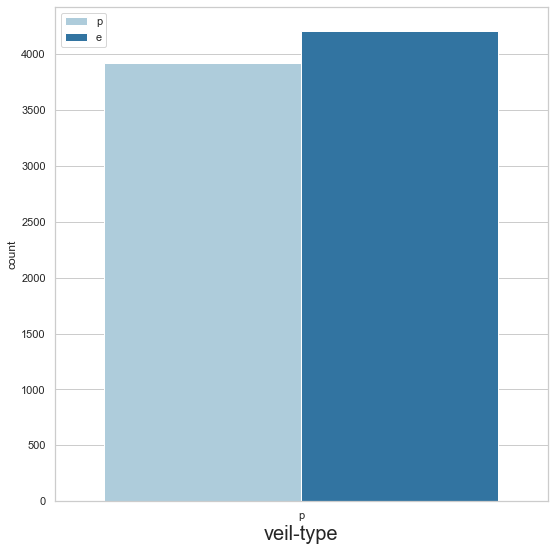

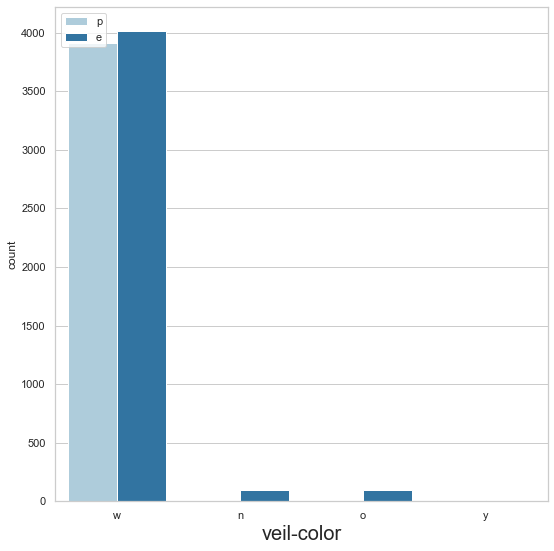

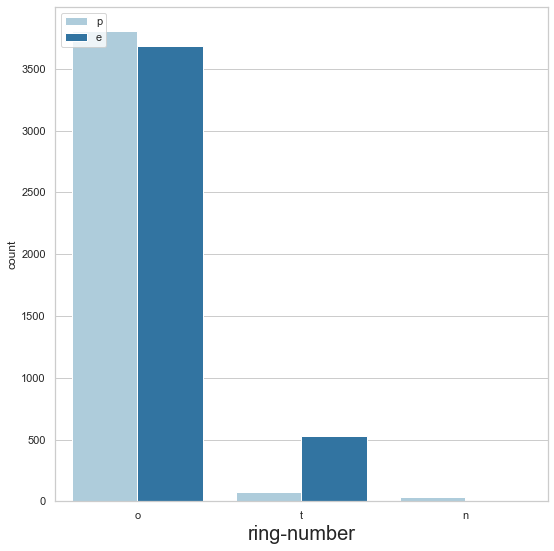

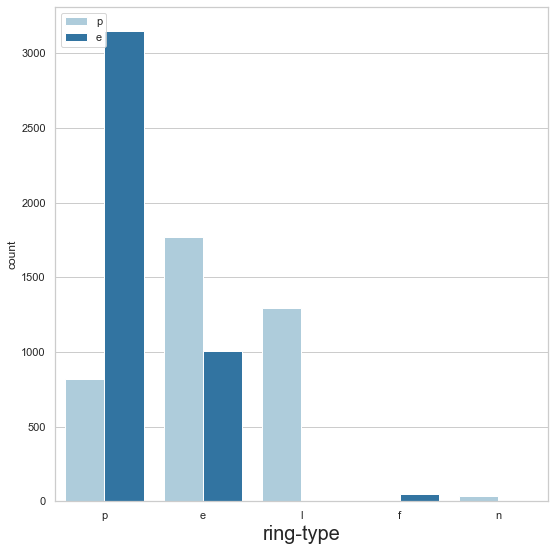

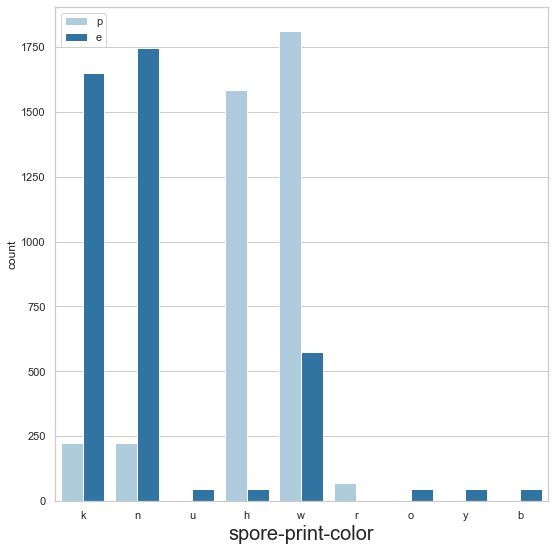

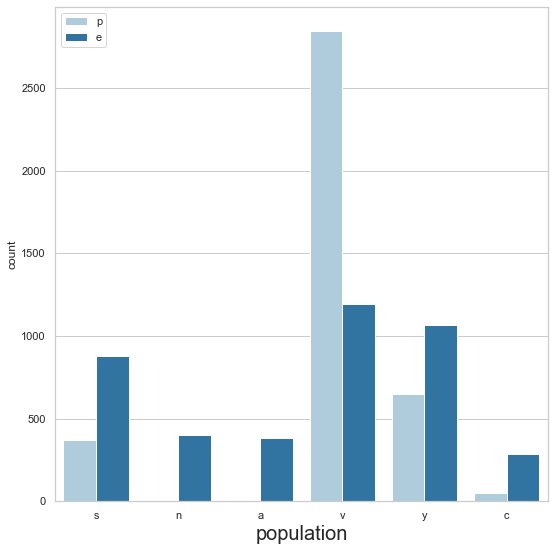

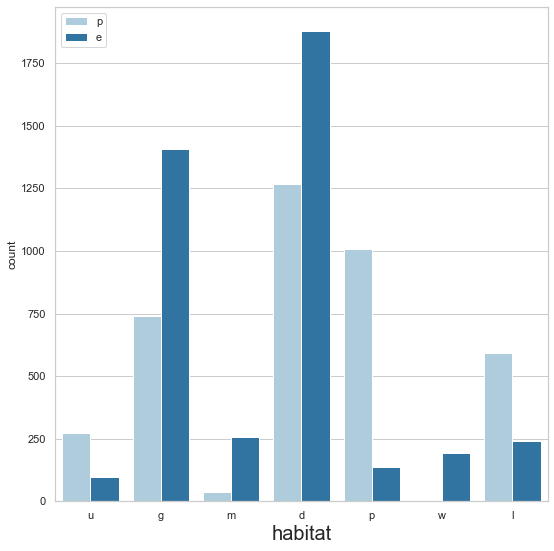

In [139]:
for col in M_cols[1:]: 
    plt.figure(figsize=(30,20))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue='class', data=Mushroom_df ,palette='Paired')
    plt.xlabel(col, fontsize=20)
    plt.legend(loc='upper left')

In [108]:
[ pd.pivot_table(Mushroom_df, index=[col,"class"], aggfunc = {col:np.count_nonzero}) for col in M_cols[1:]]

[                 cap-shape
 cap-shape class           
 b         e            404
           p             48
 c         p              4
 f         e           1596
           p           1556
 k         e            228
           p            600
 s         e             32
 x         e           1948
           p           1708,
                    cap-surface
 cap-surface class             
 f           e             1560
             p              760
 g           p                4
 s           e             1144
             p             1412
 y           e             1504
             p             1740,
                  cap-color
 cap-color class           
 b         e             48
           p            120
 c         e             32
           p             12
 e         e            624
           p            876
 g         e           1032
           p            808
 n         e           1264
           p           1020
 p         e             56
          

In [109]:
Del_cols = ['class','gill-attachment', 'stalk-shape', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number'] 
X =Mushroom_df.copy()
for col in Del_cols:
    X = X.drop(col, axis = 1)
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head(2)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [110]:
y = Mushroom_df['class']
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 101)


In [112]:
def cross_val(model_name,model,X,y,cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

index = ['Valid1','Valid2','Valid3','Valid4','Valid5']
scoring = ['accuracy','precision', 'recall','f1']

In [113]:
LR = LogisticRegression()
#cross validation
LR_report = pd.DataFrame(cross_validate(LR, X, y, scoring=scoring))
LR_report = LR_report.iloc[:,2:]
#naming the columns
LR_report.columns = scoring
#naming the index
LR_report.index = index

model_1 = []#final result collection

print("Clasification report:\n")#Classification report
print(LR_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(LR_report[score].mean(),4)}")
    model_1.append(round(LR_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.896000   1.000000  0.784439  0.879199
Valid2  0.999385   1.000000  0.998723  0.999361
Valid3  0.973538   1.000000  0.945083  0.971766
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.862069   0.782038  0.989783  0.873732 


Mean Scores:

	accuracy: 0.9462
	precision: 0.9564
	recall: 0.9436
	f1: 0.9448


In [114]:
LR.fit(X_train, y_train)#training
y_predict = LR.predict(X_test)#predicting
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})#camparison
Logistic_Regression.to_csv("Logistic Regression.csv")#export

In [143]:
#model
DT = DecisionTreeClassifier()
#cross validation
DT_report = pd.DataFrame(cross_validate(DT, X, y, scoring=scoring))
#getting required score methods
DT_report = DT_report.iloc[:,2:]
#naming the columns
DT_report.columns = scoring
#naming the index
DT_report.index = index

#final result collection
model_2 = []

#Classification report
print("Clasification report:\n")
print(DT_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(DT_report[score].mean(),4)}")
    model_2.append(round(DT_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462    1.00000  0.673469  0.804878
Valid2  1.000000    1.00000  1.000000  1.000000
Valid3  1.000000    1.00000  1.000000  1.000000
Valid4  1.000000    1.00000  1.000000  1.000000
Valid5  0.985222    0.97026  1.000000  0.984906 


Mean Scores:

	accuracy: 0.9655
	precision: 0.9941
	recall: 0.9347
	f1: 0.958


In [125]:
DT.fit(X_train, y_train)#training
y_predict = DT.predict(X_test)#predicting
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})#df for camparison
Decision_Tree.to_csv("Decision Tree.csv")

In [117]:
RF = RandomForestClassifier()
#cross validation
RF_report = pd.DataFrame(cross_validate(RF, X, y, scoring=scoring))
#getting required score methods
RF_report = RF_report.iloc[:,2:]
#naming the columns
RF_report.columns = scoring
#naming the index
RF_report.index = index

#final result collection
model_3 = []

#Classification report
print("Clasification report:\n")
print(RF_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(RF_report[score].mean(),4)}")
    model_3.append(round(RF_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462   1.000000  0.673469  0.804878
Valid2  1.000000   1.000000  1.000000  1.000000
Valid3  0.999385   1.000000  0.998723  0.999361
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.871921   0.790111  1.000000  0.882751 


Mean Scores:

	accuracy: 0.9428
	precision: 0.958
	recall: 0.9344
	f1: 0.9374


In [118]:
#sample prediction for csv file
RF.fit(X_train, y_train)#training
y_predict = RF.predict(X_test)#predicting
Random_Forest = pd.DataFrame({'y_test':y_test,'prediction':y_predict})#df for camparison
Random_Forest.to_csv("Random Forest.csv")#export to csv

In [119]:
XGB = XGBClassifier()
#cross validation
XGB_report = pd.DataFrame(cross_validate(XGB, X, y, scoring=scoring))
#getting required score methods
XGB_report = XGB_report.iloc[:,2:]
#naming the columns
XGB_report.columns = scoring
#naming the index
XGB_report.index = index

#final result collection
model_4 = []
#Classification report
print("Clasification report:\n")
print(XGB_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(XGB_report[score].mean(),4)}")
    model_4.append(round(XGB_report[score].mean(),4))

[00:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [120]:
XGB.fit(X_train, y_train)#training
y_predict = XGB.predict(X_test)#predicting
XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})#df for camparison
XGBoost.to_csv("XGBoost.csv")

[00:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [122]:
SVM = SVC(kernel = 'linear')
#cross validation
SVM_report = pd.DataFrame(cross_validate(SVM, X, y, scoring=scoring))
#getting required score methods
SVM_report = SVM_report.iloc[:,2:]
#naming the columns
SVM_report.columns = scoring
#naming the index
SVM_report.index = index

#final result collection
model_5 = []
#Classification report
print("Clasification report:\n")
print(SVM_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(SVM_report[score].mean(),4)}")
    model_5.append(round(SVM_report[score].mean(),4))
    

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462   1.000000  0.673469  0.804878
Valid2  1.000000   1.000000  1.000000  1.000000
Valid3  0.995692   1.000000  0.991060  0.995510
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.805419   0.715605  0.989783  0.830654 


Mean Scores:

	accuracy: 0.9287
	precision: 0.9431
	recall: 0.9309
	f1: 0.9262


In [124]:
Models = pd.DataFrame({
    'Logistic Regression': np.array(model_1),
    'Decision Tree': np.array(model_2),
    'Random Forest': np.array(model_3),
    'XGBoost': np.array(model_4),
    'Support Vector Machines': np.array(model_5)})
Models.index = scoring
#Models.sort_values(by='Score', ascending=False)
Models

,Logistic Regression,Decision Tree,Random Forest,XGBoost,Support Vector Machines
accuracy,0.9462,0.9655,0.9428,0.9477,0.9287
precision,0.9564,0.9941,0.9580,0.9659,0.9431
recall,0.9436,0.9347,0.9344,0.9324,0.9309
f1,0.9448,0.9580,0.9374,0.9413,0.9262
